In [5]:
import hdbscan
import umap
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
# bokeh basics
from bokeh.io import show, output_notebook
import numpy as np
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform
import bokeh.models as bmo
import random
import colorsys

In [6]:
df = pd.read_excel('Areas y población Mun_COL 2005_2017.xlsx').iloc[:-1,:]

In [7]:
df.head()

,DP,DPNOM,DPMP,MPIO,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
0,5,Antioquia,5001,Medellín,2214494,2175681,38813,2508452,2479990,28462,112.599136,3.333152,256.106044,109.980043,14.609643,242.850543
1,5,Antioquia,5002,Abejorral,20249,6271,13978,19096,6765,12331,1.153995,0.144522,505.945056,1.236794,0.106953,505.790367
2,5,Antioquia,5004,Abriaquí,2690,858,1832,2019,724,1295,0.531890,0.000000,287.578156,0.156826,0.029510,296.769644
3,5,Antioquia,5021,Alejandría,3816,1896,1920,3393,1804,1589,0.371011,0.000000,126.738351,0.399738,0.000000,128.532415
4,5,Antioquia,5030,Amagá,27155,14070,13085,29980,17174,12806,2.801529,0.130832,80.214944,1.509397,1.828286,80.794794


In [8]:
df.describe()

,DP,DPMP,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
count,1122.000000,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,38.282531,38716.410873,3.822513e+04,2.842184e+04,9803.291444,4.393192e+04,3.370415e+04,10227.770053,3.085113,0.456685,1013.052786,4.879983,0.915556,850.764482
std,26.588271,26574.905059,2.329032e+05,2.312218e+05,9926.745333,2.732377e+05,2.715673e+05,11762.363632,14.264436,1.105590,3211.782856,45.361030,1.756232,2937.666290
min,5.000000,5001.000000,0.000000e+00,0.000000e+00,0.000000,3.920000e+02,0.000000e+00,172.000000,0.000000,0.000000,0.000000,0.041805,0.000000,0.000000
25%,15.000000,15677.250000,6.817750e+03,1.693500e+03,4014.250000,6.697250e+03,1.911250e+03,3663.250000,0.306696,0.000000,127.820304,0.407813,0.050280,121.297972
50%,25.000000,25840.000000,1.251500e+04,4.158000e+03,7019.500000,1.357050e+04,5.013000e+03,6739.000000,0.697962,0.098596,280.058571,0.901225,0.310458,264.993219
75%,66.000000,66543.000000,2.384975e+04,1.079150e+04,12256.750000,2.685875e+04,1.319200e+04,12840.500000,1.805689,0.411744,706.791479,2.331975,0.965454,619.197173
max,99.000000,99773.000000,6.840116e+06,6.824507e+06,109982.000000,8.080734e+06,8.063991e+06,173143.000000,380.743770,14.012152,65560.804906,1432.794977,18.141420,65594.340099


# Visualization

First we will visualize the data

In [9]:
#data = np.log(df.iloc[:, 4:].values + 1)
data = df.iloc[:, 4:].values
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

In [10]:
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(scaled)

/home/lfardilap/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 10 separate connected components using meta-embedding (experimental)
  n_components


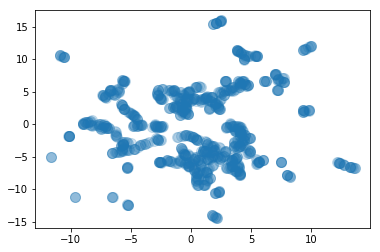

In [11]:
plt.scatter(*embedding.T, s=100, alpha=0.2)
plt.show()

In [12]:
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size')
])

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5)
output_file('raw_data.html')
show(p)

We see that only two groups are formed, and that the capital cities are not in a single clear group. This indicates that raw data must be complemented with more meaningful features.

## Adding new features

An initial thing to do is to add features that are important in measuring the expansion of a town. In particular we add new variables
\begin{align}
\rho_\text{year} &= \frac{\text{population in year}}{\text{area in year}}\\
\Delta \text{population} &= \frac{\text{population in 2017}}{ \text{population in 2005}}\\
\Delta \text{area} &= \frac{\text{area in 2017} }{ \text{area in 2005}}\\
C &= \rho_{2017}-\rho_{2005}
\end{align}

In [13]:
df['dens_2005_cab'] = df.iloc[:, 5].values/(df.iloc[:, 10].values + 1)
df['dens_2005_res'] = df.iloc[:, 6].values/(df.iloc[:, 12].values + 1)
df['dens_2017_cab'] = df.iloc[:, 8].values/(df.iloc[:, 13].values + 1)
df['dens_2017_res'] = df.iloc[:, 9].values/(df.iloc[:, 15].values + 1)

df['del_pop_tot'] = df.iloc[:, 7].values / (df.iloc[:, 4].values + 1)
df['del_pop_cab'] = df.iloc[:, 8].values / (df.iloc[:, 5].values + 1)
df['del_pop_res'] = df.iloc[:, 9].values / (df.iloc[:, 6].values + 1)

df['del_are_cab'] = df.iloc[:, 13].values / (df.iloc[:, 10].values + 1)
df['del_are_cen'] = df.iloc[:, 14].values / (df.iloc[:, 11].values + 1)
df['del_are_res'] = df.iloc[:, 15].values / (df.iloc[:, 12].values + 1)

df['c_cab'] = df['dens_2017_cab'].values - df['dens_2005_cab'].values
df['c_res'] = df['dens_2017_res'].values - df['dens_2005_res'].values

In [14]:
data = np.hstack((np.log(df.iloc[:, 4:16].values + 1), df.iloc[:, 16:]) )
#data = df.iloc[:, 4:]
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

In [15]:
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(scaled)

/home/lfardilap/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


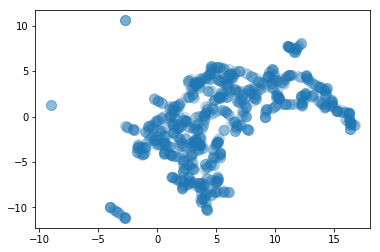

In [16]:
plt.scatter(*embedding.T, s=100, alpha=0.2)
plt.show()

In [19]:
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'], size=logpop - min(logpop) + 1, clase=labels) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(clase))]

color_map = bmo.CategoricalColorMapper(factors=list(set(clase_pos_bog)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('log_data_with_features.html')
show(p)

NameError: name 'labels' is not defined

# Unsupervised Clustering with HDBSCAN

In [20]:
import itertools

for pair in itertools.product(range(5, 30), range(1, 10)):
    mcs, ms = pair
    clusterer = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=ms, allow_single_cluster=True)
    r = clusterer.fit(scaled)
    print(Counter(clusterer.labels_), mcs, ms)

Counter({0: 1108, -1: 14}) 5 1
Counter({2: 1051, -1: 47, 0: 19, 1: 5}) 5 2
Counter({1: 1086, 0: 19, -1: 17}) 5 3
Counter({3: 801, -1: 291, 0: 19, 1: 6, 2: 5}) 5 4
Counter({1: 1085, 0: 19, -1: 18}) 5 5
Counter({0: 1084, -1: 21, 1: 17}) 5 6
Counter({1: 1086, -1: 19, 0: 17}) 5 7
Counter({1: 1086, -1: 20, 0: 16}) 5 8
Counter({1: 1086, -1: 23, 0: 13}) 5 9
Counter({0: 1108, -1: 14}) 6 1
Counter({1: 1087, 0: 19, -1: 16}) 6 2
Counter({2: 801, -1: 290, 0: 19, 1: 6, 3: 6}) 6 3
Counter({2: 825, -1: 272, 0: 19, 1: 6}) 6 4
Counter({1: 1085, 0: 19, -1: 18}) 6 5
Counter({0: 1084, -1: 21, 1: 17}) 6 6
Counter({1: 1086, -1: 19, 0: 17}) 6 7
Counter({1: 1086, -1: 20, 0: 16}) 6 8
Counter({1: 1086, -1: 23, 0: 13}) 6 9
Counter({1: 1089, 0: 19, -1: 14}) 7 1
Counter({1: 1087, 0: 19, -1: 16}) 7 2
Counter({1: 1086, 0: 19, -1: 17}) 7 3
Counter({1: 1086, 0: 19, -1: 17}) 7 4
Counter({1: 1085, 0: 19, -1: 18}) 7 5
Counter({0: 1084, -1: 21, 1: 17}) 7 6
Counter({1: 1086, -1: 19, 0: 17}) 7 7
Counter({1: 1086, -1: 20, 0:

This output shows that HDBSCAN cannot solve the problem efficiently. Therefore, we must use the heavy old weapons such as K-means and gap statistics.